In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#OLID_TRAIN_DATA = 'data/olid-train.csv'
OLID_TRAIN_S_DATA = 'data/olid-train-small.csv'
OLID_TEST_DATA = 'data/olid-test.csv'
HASOC_DATA = 'data/hasoc-train.csv'

#olid_train= pd.read_csv(OLID_TRAIN_DATA)
olid_train_s= pd.read_csv(OLID_TRAIN_S_DATA)
olid_test= pd.read_csv(OLID_TEST_DATA)
hasoc = pd.read_csv(HASOC_DATA)

In [3]:
def label_distribution(olid_train_s, olid_test, hasoc):

    X = ['0','1']
    #This computes fractions
    olid_train_s_distr = list(olid_train_s['labels'].value_counts(normalize=True).values)
    olid_test_distr = list(olid_test['labels'].value_counts(normalize=True).values)
    hasoc_distr = list(hasoc['labels'].value_counts(normalize=True).values)

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.2, olid_train_s_distr, 0.2, label = 'OLID_train_small')
    plt.bar(X_axis + 0, olid_test_distr, 0.2, label = 'OLID_test')
    plt.bar(X_axis + 0.2, hasoc_distr, 0.2, label = 'HASOC')


    plt.xticks(X_axis, X)
    plt.xlabel("Label")
    plt.ylabel("Fraction")
    plt.title("Fraction of offensive texts")
    plt.legend()
    plt.tight_layout()
    plt.savefig('Images/label_distribution.png')
    plt.show()


In [4]:
def mean_sentence_length(olid_train_s, olid_test, hasoc):

    mean_olid_train = [len(x.split()) for x in olid_train_s['text']]
    mean_olid_test = [len(x.split()) for x in olid_test['text']]
    mean_hasoc = [len(x.split()) for x in hasoc['text']]

    print(f"Mean length olid_train_s: {np.mean(mean_olid_train)} words")
    print(f"Mean length olid_test: {np.mean(mean_olid_test)} words")
    print(f"Mean length HASOC: {np.mean(mean_hasoc)} words")

    bins = np.linspace(0, 80, 30)

    plt.hist([mean_olid_train, mean_olid_test, mean_hasoc], bins, label=['olid_train_s', 'olid_test', 'HASOC'], density=True)
    plt.legend(loc='upper right')
    plt.xlabel("Number of words")
    plt.ylabel("Fraction")
    plt.title("Distribution of sentence length in words")
    plt.tight_layout()
    plt.savefig('Images/sentence_length.png')
    plt.show()

In [5]:
def mean_sentence_length_char(olid_train_s, olid_test, hasoc):

    mean_olid_train = olid_train_s['text'].str.len()
    mean_olid_test = olid_test['text'].str.len()
    mean_hasoc = hasoc['text'].str.len()

    print(f"Mean length olid_train_s: {np.mean(mean_olid_train)} characters")
    print(f"Mean length olid_test: {np.mean(mean_olid_test)} characters")
    print(f"Mean length HASOC: {np.mean(mean_hasoc)} characters")

    bins = np.linspace(0, 300, 30)

    plt.hist([mean_olid_train, mean_olid_test, mean_hasoc], bins, label=['olid_train_s', 'olid_test', 'HASOC'], density=True)
    plt.legend(loc='upper right')
    plt.xlabel("Number of characters")
    plt.ylabel("Fraction")
    plt.title("Distribution of sentence length in characters")
    plt.tight_layout()
    plt.savefig('Images/sentence_length_char.png')
    plt.show()

In [6]:
def mean_sentence_length_classes(olid_train_s, olid_test, hasoc):
    olid_train_0 = olid_train_s[olid_train_s['labels'] == 0]
    olid_train_1 = olid_train_s[olid_train_s['labels'] == 1]
    olid_test_0 = olid_test[olid_test['labels'] == 0]
    olid_test_1 = olid_test[olid_test['labels'] == 1]
    hasoc_0 = hasoc[hasoc['labels'] == 0]
    hasoc_1 = hasoc[hasoc['labels'] == 1]

    mean_olid_train_0 = [len(x.split()) for x in olid_train_0['text']]
    mean_olid_train_1 = [len(x.split()) for x in olid_train_1['text']]
    mean_olid_test_0 = [len(x.split()) for x in olid_test_0['text']]
    mean_olid_test_1 = [len(x.split()) for x in olid_test_1['text']]
    mean_hasoc_0 = [len(x.split()) for x in hasoc_0['text']]
    mean_hasoc_1 = [len(x.split()) for x in hasoc_1['text']]

    print(f"Mean length olid_train, label 0: {np.mean(mean_olid_train_0)} words")
    print(f"Mean length olid_train, label 1: {np.mean(mean_olid_train_1)} words")
    print(f"Mean length olid_test, label 0: {np.mean(mean_olid_test_0)} words")
    print(f"Mean length olid_test, label 1: {np.mean(mean_olid_test_1)} words")
    print(f"Mean length HASOC, label 0: {np.mean(mean_hasoc_0)} words")
    print(f"Mean length HASOC, label 1: {np.mean(mean_hasoc_1)} words")

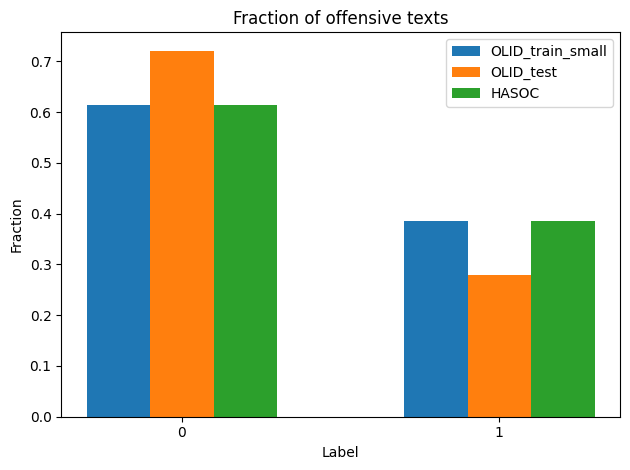

In [7]:
label_distribution(olid_train_s, olid_test, hasoc)

Mean length olid_train_s: 22.435406698564595 words
Mean length olid_test: 24.372093023255815 words
Mean length HASOC: 23.292036910457963 words


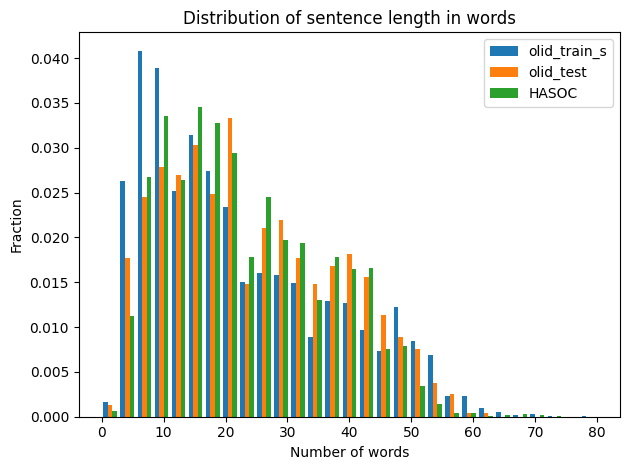

In [8]:
mean_sentence_length(olid_train_s, olid_test, hasoc)

Mean length olid_train_s: 126.28998632946 characters
Mean length olid_test: 146.11162790697674 characters
Mean length HASOC: 167.04477101845524 characters


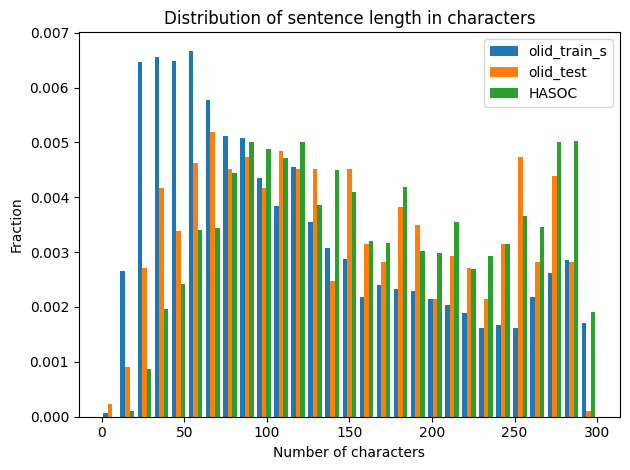

In [9]:
mean_sentence_length_char(olid_train_s, olid_test, hasoc)

In [10]:
mean_sentence_length_classes(olid_train_s, olid_test, hasoc)

Mean length olid_train, label 0: 21.784461152882205 words
Mean length olid_train, label 1: 23.469261388766032 words
Mean length olid_test, label 0: 24.88225806451613 words
Mean length olid_test, label 1: 23.054166666666667 words
Mean length HASOC, label 0: 22.61542745753272 words
Mean length HASOC, label 1: 24.366651923927467 words


In [11]:
hasoc

,id,text,labels
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,0
1,hasoc_en_2,@politico No. We should remember very clearly ...,1
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,0
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,0
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,0
...,...,...,...
5847,hasoc_en_5848,"@davidfrum @trueblueusa1 That's cute and all, ...",1
5848,hasoc_en_5849,a recession issa comin' #maga #magamyass #fuck...,0
5849,hasoc_en_5850,#DoctorsFightBack Will 'The Mad n Irrational ...,1
5850,hasoc_en_5851,#ShiningIndia #educatedindia or more like RUND...,1
